<a href="https://colab.research.google.com/github/PathanAK/nlp/blob/main/nlp_with_rfc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Corona_NLP_train.csv to Corona_NLP_train.csv


In [9]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import re 
import nltk 
from nltk.stem.porter import PorterStemmer

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

In [10]:
import io


In [11]:
train= pd.read_csv(io.BytesIO(uploaded['Corona_NLP_train.csv']),encoding = "ISO-8859-1")

In [12]:
x = train['OriginalTweet'].copy()
y = train['Sentiment'].copy()


In [13]:
encoding = {'Extremely Negative': 0,
            'Negative': 0,
            'Neutral': 1,
            'Positive':2,
            'Extremely Positive': 2
           }

labels = ['Negative', 'Neutral', 'Positive']

           

y.replace(encoding, inplace=True)

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
def data_cleaner(tweet):
    
    # remove urls
    tweet = re.sub(r'http\S+', ' ', tweet)
    
    tweet = re.sub('[^a-zA-Z]',' ',tweet)
    
    # remove html tags
    tweet = re.sub(r'<.*?>',' ', tweet)
    
    # remove digits
    tweet = re.sub(r'\d+',' ', tweet)
    
    # remove hashtags
    tweet = re.sub(r'#\w+',' ', tweet)
    
    # remove mentions
    tweet = re.sub(r'@\w+',' ', tweet)
    
    #removing stop words
#     tweet = tweet.split()
    
    tweet=[word.lower() for word in tweet.split()]
    
    stop_words = stopwords.words('english')
    tweet = " ".join([word for word in tweet if not word in stop_words])
    
    return tweet
X= x.apply(lambda x : data_cleaner(x))


In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
count_vectorizer = TfidfVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english',max_features=10000)    

tfidf = count_vectorizer.fit_transform(X)

len(count_vectorizer.get_feature_names())

10000

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, y, test_size=0.20)


In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score
from sklearn import metrics
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

In [19]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha=0.001)

In [20]:
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

In [25]:
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)


accuracy:   0.664


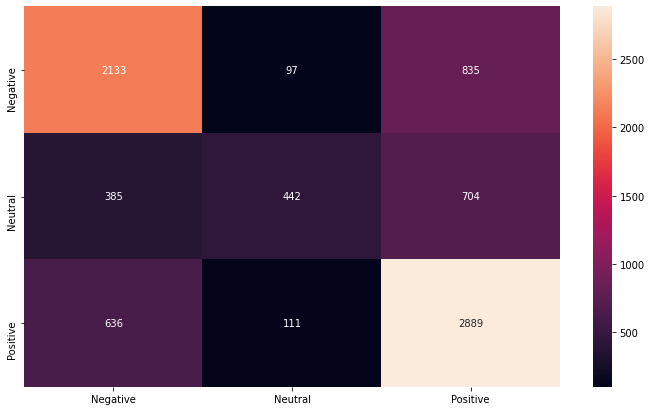

In [26]:
conf = confusion_matrix(y_test, pred)


cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)

plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc=RandomForestClassifier(random_state=42)

In [32]:
rfc1=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 200, criterion='gini',n_jobs = -1)

In [33]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [34]:
r_pred=rfc1.predict(X_test)

In [37]:
print("Accuracy for Random Forest : ",accuracy_score(y_test,r_pred))

Accuracy for Random Forest :  0.7265549076773566


In [35]:
cm3=confusion_matrix(y_test, r_pred)
print (cm3)

[[2189  297  579]
 [ 263  940  328]
 [ 482  302 2852]]


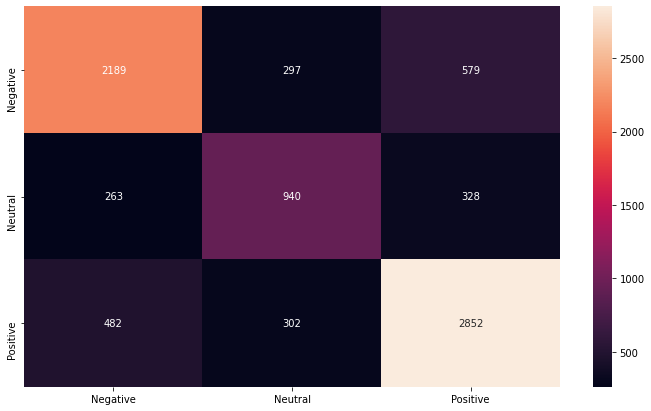

In [36]:
conf = confusion_matrix(y_test, r_pred)


cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)

plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()